#### Import Libraries 

In [1]:
import os 

import xarray as xr 
import matplotlib.pyplot as plt  

import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Open Data

In [2]:
ds = xr.open_dataset('aux_variables.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:      (latitude: 420, longitude: 700)
Coordinates:
    band         int64 ...
    spatial_ref  int64 ...
  * latitude     (latitude) float32 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * longitude    (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
    level        float32 ...
Data variables:
    pop          (latitude, longitude) float64 ...
    z            (latitude, longitude) float64 ...

#### Calcule full statistics

In [4]:
pop = ds['pop']
z = ds['z']

In [5]:
print(pop.shape)
print(z.shape)

(420, 700)
(420, 700)


In [6]:
mean_pop = pop.mean()
std_pop = pop.std()
mean_z = z.mean()
std_z = z.std()

In [7]:
print(mean_pop.item())
print(std_pop.item())
print(mean_z.item())
print(std_z.item())

0.3914702920148122
2.6252136232443157
-791.5151807792715
1690.0972666014845


In [8]:
pop_norm = (pop - mean_pop)/std_pop
z_norm = (z - mean_z)/std_z

In [9]:
print(pop_norm.mean().item())
print(z_norm.mean().item())
print(pop_norm.std().item())
print(z_norm.std().item())

2.3201395453391027e-18
1.7787736514266455e-17
1.0000000000016291
1.0


In [10]:
print(pop.shape)
print(z.shape)

(420, 700)
(420, 700)


In [11]:
ds_norm = xr.Dataset({'pop': pop_norm, 'z': z_norm})

In [12]:
ds_norm

<xarray.Dataset>
Dimensions:      (latitude: 420, longitude: 700)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
  * latitude     (latitude) float32 71.95 71.85 71.75 ... 30.25 30.15 30.05
  * longitude    (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
    level        float32 0.0
Data variables:
    pop          (latitude, longitude) float64 -0.1491 -0.1491 ... -0.1491
    z            (latitude, longitude) float64 1.526 1.397 ... 0.6459 0.6377

In [13]:
def plot_variables_map(ds):

    vars_to_plot = ['pop', 'z']

    fig, axes = plt.subplots(1, 2, figsize=(18, 8),
                             subplot_kw={'projection': ccrs.PlateCarree()})

    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        data = ds[var]
        
        im = ax.imshow(data, origin='upper', cmap='viridis',
                       extent=[ds.longitude.min(), ds.longitude.max(),
                               ds.latitude.min(), ds.latitude.max()])
        
        ax.set_title(var)
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.gridlines(draw_labels=True)
        
        cbar = fig.colorbar(im, ax=ax, shrink=0.8)
    
    plt.tight_layout()
    plt.show()

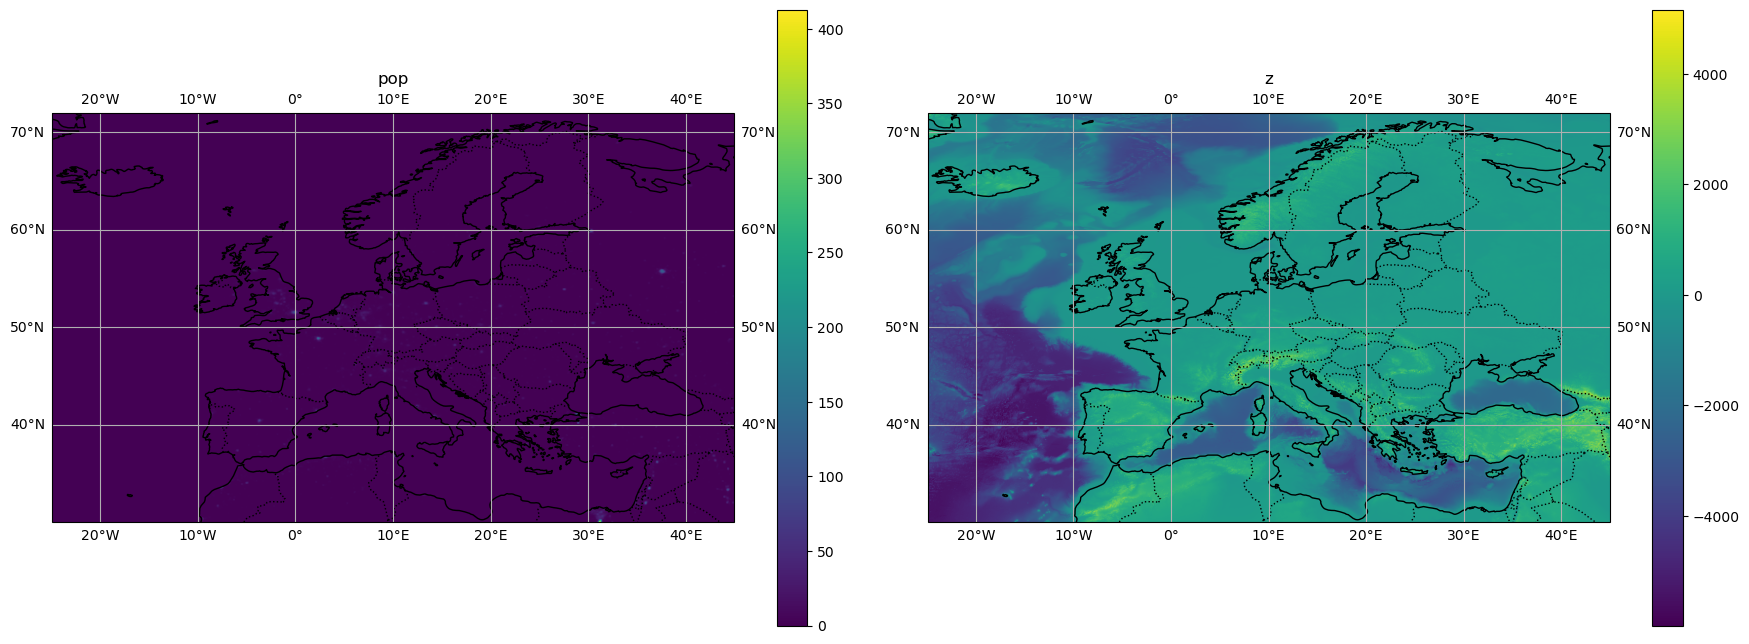

In [14]:
plot_variables_map(ds)

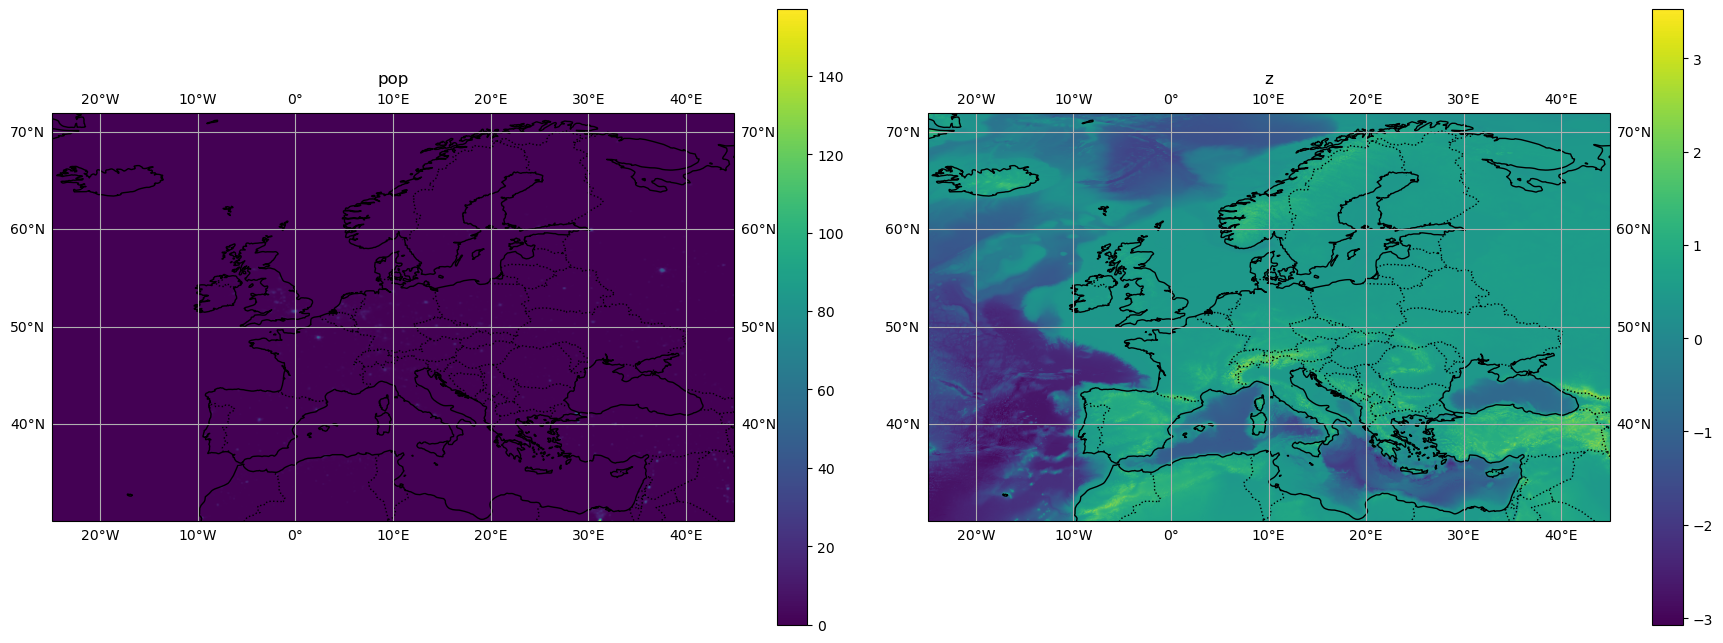

In [25]:
plot_variables_map(ds_norm)

In [26]:
ds_norm.to_netcdf('aux_variables_standarized.nc')